In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()

### Initialize your cluster centers

In [31]:
def initialize_clusters(data, k):
    """initialize the k cluster centers (the means).
    input:
        data: original data with shape (num_sample, num_feature).
        k: predefined number of clusters for the k-means algorithm.
    output:
        a numpy array with shape (k, num_feature)
    """
    # ***************************************************************************************************
    # INSERT YOUR CODE HERE
    # TODO: initialize cluster centers.
    # TODO: Make sure you choose k clusters from the data itself,
    #       or ensure otherwise that your initializations have the same scaling as the data
    # ***************************************************************************************************
    idx = np.random.choice(data.shape[0], size=k, replace=False)
    return data[idx,:]
    
mu = initialize_clusters(data, 10)
print(mu)

[[  2.1    60.   ]
 [  4.117  81.   ]
 [  2.383  71.   ]
 [  4.083  93.   ]
 [  4.5    82.   ]
 [  4.583  77.   ]
 [  1.817  46.   ]
 [  4.367  88.   ]
 [  1.783  46.   ]
 [  2.1    49.   ]]


### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [32]:
def build_distance_matrix(data, mu):
    """build a distance matrix.

    row of the matrix represents the data point,
    column of the matrix represents the k-th cluster.
    """
    distance_list = []
    num_cluster, _ = mu.shape
    for k_th in range(num_cluster):
        sum_squares = np.sum(np.square(data - mu[k_th, :]), axis=1)
        distance_list.append(sum_squares)
    return np.matrix(distance_list).T
    
mat = build_distance_matrix(data, mu)
print(mat.shape)
print(mat)

(272, 10)
[[  3.63250000e+02   4.26728900e+00   6.54810890e+01 ...,   8.15882890e+01
    1.09230149e+03   9.02250000e+02]
 [  3.60900000e+01   7.34368489e+02   2.89339889e+02 ...,   1.16258949e+03
    6.40002890e+01   2.50900000e+01]
 [  1.97520289e+02   4.96146560e+01   9.90250000e+00 ...,   1.97069156e+02
    7.86402500e+02   6.26520289e+02]
 ..., 
 [  9.05368489e+02   8.10900000e+01   3.65137156e+02 ...,   4.00250000e+00
    1.94293796e+03   1.68636849e+03]
 [  1.96080089e+02   1.23029000e+03   6.25320356e+02 ...,   1.77050250e+03
    1.15600000e-03   9.08008900e+00]
 [  2.01602689e+02   4.91225000e+01   1.33430560e+01 ...,   1.96010000e+02
    7.91203856e+02   6.30602689e+02]]


#### Update k-means parameters

In [34]:
def update_kmeans_parameters(data, mu_old):
    """update the parameter of kmeans
    return:
        losses: loss of each data point with shape (num_samples, 1)
        assignments: assignments vector z with shape (num_samples, k)
        mu: mean vector mu with shape (k, num_features)
    """
    losses = np.zeros((data.shape[0],1))
    assignments = np.zeros((data.shape[0],mu_old.shape[0]))  
    mu = np.zeros((mu_old.shape[0], data.shape[1]))
    
    dist = build_distance_matrix(data, mu_old)
        
    for i in range(data.shape[0]):
        losses[i] = np.min(dist[i,:])
        assignments[i, np.argmin(dist[i,:])] = 1
                
    for k in range(mu_old.shape[0]):
        mu[k, :] = np.dot(assignments[:,k],data)/sum(assignments[:,k])
        
    return losses, assignments, mu

losses, assignments, mu_new = update_kmeans_parameters(data, mu)

#### Play with k-means

The current iteration of k-means is: 0, 
the average loss is 133.86616498161766.


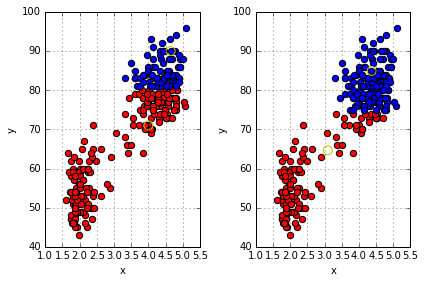

The current iteration of k-means is: 1, 
the average loss is 71.2753399310624.


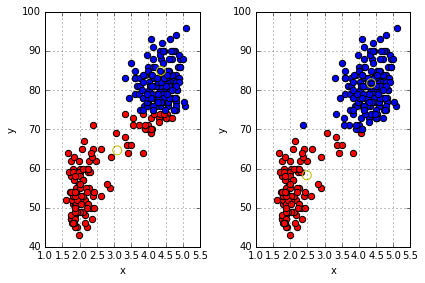

The current iteration of k-means is: 2, 
the average loss is 38.08245757697684.


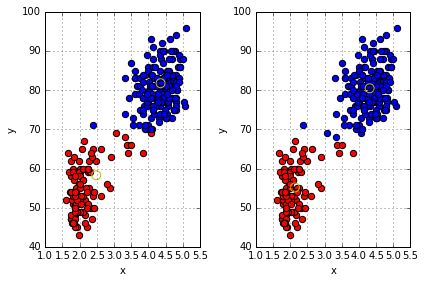

The current iteration of k-means is: 3, 
the average loss is 32.81512971023836.


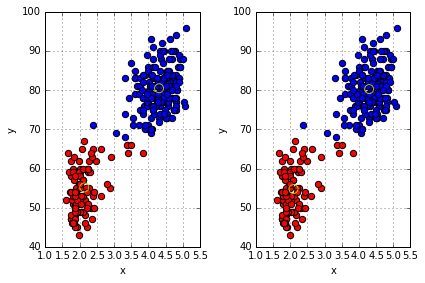

The current iteration of k-means is: 4, 
the average loss is 32.72709088583533.


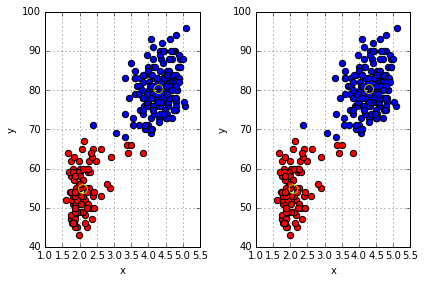

The current iteration of k-means is: 5, 
the average loss is 32.72709088583533.


In [40]:
from helper import build_dir
from plots import plot

def kmeans(data, k, max_iters, threshold):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \nthe average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iter))
        # update k-means information.
        mu_old = mu

# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
kmeans(data, k, max_iters, threshold)

## Using k-means for image compresson

#### load image

In [36]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype))

Original image: the shape of image=(480, 480, 3), the data type=uint8.


#### preprocess image

In [60]:
def preprocess_image(original_image):
    """preprocess the image."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: vectorize and normalize the original_image.
    # *************************************************** 
    
    processed_image = np.zeros((original_image.shape[0]*original_image.shape[1], original_image.shape[2]))
    
    for i in range(original_image.shape[0]):
        for j in range(original_image.shape[1]):
            processed_image[i*original_image.shape[0] + j,:] = original_image[i][j]
    
    #processed_image = normalize_data(processed_image)
    return processed_image

processed_image = preprocess_image(original_image)
print(processed_image.shape)

(230400, 3)


The current iteration of k-means is: 0, 
the average loss is 3543.9582465277776.
The current iteration of k-means is: 1, 
the average loss is 2550.263170722822.
The current iteration of k-means is: 2, 
the average loss is 2152.052826111531.
The current iteration of k-means is: 3, 
the average loss is 1780.453141162397.
The current iteration of k-means is: 4, 
the average loss is 1677.6273640339405.
The current iteration of k-means is: 5, 
the average loss is 1652.2357078983903.
The current iteration of k-means is: 6, 
the average loss is 1642.7821219360585.
The current iteration of k-means is: 7, 
the average loss is 1638.1492189276228.
The current iteration of k-means is: 8, 
the average loss is 1635.590000220054.
The current iteration of k-means is: 9, 
the average loss is 1634.136970055342.
The current iteration of k-means is: 10, 
the average loss is 1633.2869397144098.
The current iteration of k-means is: 11, 
the average loss is 1632.7844273490155.
The current iteration of k-mean

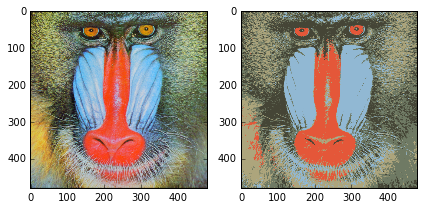

In [64]:
from plots import plot_image_compression

def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression."""
    # initialize the cluster.
    mu_old = initialize_clusters(processed_image, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iter in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        print("The current iteration of k-means is: {i}, \nthe average loss is {l}.".format(i=iter, l=average_loss))
        # check converge
        if iter > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # update k-means information.
        mu_old = mu

    # plot histgram
    plot_image_compression(original_image, processed_image, assignments, mu, k)    
    
# define parameters
k = 5
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

The current iteration of k-means is: 0, 
the average loss is 8096.729305555556.
The current iteration of k-means is: 1, 
the average loss is 5049.762759798312.
The current iteration of k-means is: 2, 
the average loss is 4983.412567626676.
The current iteration of k-means is: 3, 
the average loss is 4961.134349402065.
The current iteration of k-means is: 4, 
the average loss is 4952.141503569688.
The current iteration of k-means is: 5, 
the average loss is 4948.39079092289.
The current iteration of k-means is: 6, 
the average loss is 4946.760974317453.
The current iteration of k-means is: 7, 
the average loss is 4946.118621500305.
The current iteration of k-means is: 8, 
the average loss is 4945.843076832272.
The current iteration of k-means is: 9, 
the average loss is 4945.725843041641.
The current iteration of k-means is: 10, 
the average loss is 4945.682123990879.
The current iteration of k-means is: 11, 
the average loss is 4945.664583248561.
The current iteration of k-means is: 12

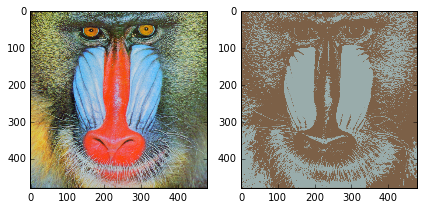

In [65]:
# define parameters
k = 2
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)

The current iteration of k-means is: 0, 
the average loss is 1499.5233072916667.
The current iteration of k-means is: 1, 
the average loss is 974.386180240401.
The current iteration of k-means is: 2, 
the average loss is 947.5654521816223.
The current iteration of k-means is: 3, 
the average loss is 939.8598122659064.
The current iteration of k-means is: 4, 
the average loss is 935.7432157159074.
The current iteration of k-means is: 5, 
the average loss is 932.710873783872.
The current iteration of k-means is: 6, 
the average loss is 930.272485308536.
The current iteration of k-means is: 7, 
the average loss is 928.2214671772565.
The current iteration of k-means is: 8, 
the average loss is 926.588277503127.
The current iteration of k-means is: 9, 
the average loss is 925.2806890855243.
The current iteration of k-means is: 10, 
the average loss is 924.2161257340872.
The current iteration of k-means is: 11, 
the average loss is 923.3408973698781.
The current iteration of k-means is: 12, 

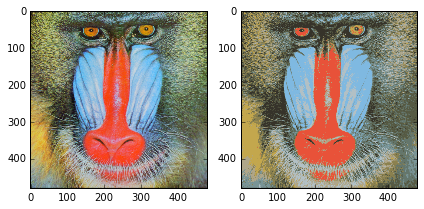

In [66]:
# define parameters
k = 10
max_iter = 100
threshold = 1e-6

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)